## Original prompt for breakout session: logistic regression!

```quote
Breakout: Logistic Regression!
[25 mins]
(1) open a jupyter notebook in visual studio code 
(2) select the datathinking.org anaconda environment

(3) ask chatgpt/claude/bard/bing for:
the mathematics (LaTeX code)
text description
    of a logistic regression model applied to a standard public dataset and a visualization of the decision boundary

(4) ask chatgpt/claude/bard/bing for a visualization using python and the altair library that is interactive

(5) screenshot and add to this figma!

(if you are unable to use visual studio code, use a google colaboratory notebook instead: https://colab.research.google.com/)
````

Result below or at https://chat.openai.com/share/c5ae1e42-f05a-4194-8ea4-7c57074dd048

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
alt.data_transformers.disable_max_rows()


DataTransformerRegistry.enable('default')

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()

# Select two features for visualization and binary classification
X = iris.data[:, [2, 3]]
y = (iris.target == 2).astype(int)  # 2 corresponds to the Iris-Virginica class

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
import numpy as np

In [22]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

# Create a meshgrid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(-2, 2, num=100), np.linspace(-2, 2, num=100))
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a DataFrame for visualization
df = pd.DataFrame({'x': xx.ravel(), 'y': yy.ravel(), 'label': Z.ravel()})

# Plot the decision boundary
chart = alt.Chart(df).mark_point().encode(
    x='x:Q',
    y='y:Q',
    color=alt.Color('label:N', scale=alt.Scale(scheme='viridis')),
    tooltip=['x', 'y', 'label']
).properties(
    width=400,
    height=400
)

chart.interactive()



alt.Chart(...)

## Prompt to learn about logistic regression

> hi GPT-4, please create latex mathematics for representing logistic regression in a canonical way and provide exact and precise standard references.

Result: https://chat.openai.com/share/2d51a256-06f1-42c6-b362-bd510a40dc90

References from ChatGPT: 

* https://hastie.su.domains/Papers/ESLII.pdf
* https://mregresion.files.wordpress.com/2012/08/agresti-introduction-to-categorical-data.pdf

## Prompt using textbook
https://mregresion.files.wordpress.com/2012/08/agresti-introduction-to-categorical-data.pdf
```quote
please summarize and create latex raw math for a jupyter notebook: 
3.2.3 Logistic Regression Model
Relationships between π(x) and x are usually nonlinear rather than linear. A fixed
change in x may have less impact when π is near 0 or 1 than when π is near the
middle of its range. In the purchase of an automobile, for instance, consider the
choice between buying new or used. Let π(x) denote the probability of selecting a
new car, when annual family income = x. An increase of $10,000 in annual family
income would likely have less effect when x = $1,000,000 (for which π is near 1)
than when x = $50,000.
In practice, π(x) often either increases continuously or decreases continuously as
x increases. The S-shaped curves displayed in Figure 3.2 are often realistic shapes
for the relationship. The most important mathematical function with this shape has
formula
π(x) = exp(α + βx)
1 + exp(α + βx) = eα+βx
1 + eα+βx
3.2 GENERALIZED LINEAR MODELS FOR BINARY DATA 71
Figure 3.2. Logistic regression functions.
using the exponential function. This is called the logistic regression function. We will
see in Chapter 4 that the corresponding logistic regression model form is
log π(x)
1 − π(x)
= α + βx (3.2)
The logistic regression model (3.2) is a special case of a GLM. The random component for the (success, failure) outcomes has a binomial distribution. The link function
is the logit function log[π/(1 − π )] of π, symbolized by “logit(π).” Logistic regression models are often called logit models. Whereas π is restricted to the 0–1 range,
the logit can be any real number. The real numbers are also the potential range for
linear predictors (such as α + βx) that form the systematic component of a GLM, so
this model does not have the structural problem that the linear probability model has.
```

Result below or at https://chat.openai.com/share/a2f0b8d1-efa9-4749-8c26-872f151e00ae


## Notes: Logistic Regression Model

Logistic Regression is a statistical model used when the dependent variable is a binary variable. This means the output or outcome is either one of two values like 0 or 1, true or false, yes or no etc. It can be used to model the probability of a certain event occurring. For example, we can define π(x) as the probability of selecting a new car given the annual family income equals x.

The relationships between the probability π(x) and the predictor variable x are usually non-linear. An increase in x might have a different impact on π(x) depending on where π is within its range.

For instance, if x represents annual family income and π(x) the probability of buying a new car, an increment of $10,000 would probably have a smaller effect when the income x is already at $1,000,000 (where the probability of buying a new car is already close to 1) compared to when the income is $50,000.

In many scenarios, the probability π(x) either continually increases or decreases as x increases. This behavior can often be described using S-shaped curves or logistic functions.

The logistic regression function is mathematically represented as:

\begin{equation}
\pi(x) = \frac{e^{(\alpha + \beta x)}}{1 + e^{(\alpha + \beta x)}}
\end{equation}

The logistic regression model has a specific form which involves a logit transformation of the probabilities, as follows:

\begin{equation}
log\left(\frac{\pi(x)}{1 - \pi(x)}\right) = \alpha + \beta x
\end{equation}

This model is a specific example of a Generalized Linear Model (GLM) with a binomial distribution for the outcomes. The link function, the function which connects the linear predictor and the mean of the distribution function, is a logit function, hence such models are often referred to as logit models. Unlike the probability π which lies in the range of 0 to 1, the logit can be any real number.

## Wait, how does this connect to last lecture? 

Prompt:

```quote
sorry GPT-4, i'm confused. last lecture, we thought the logistic function was defined using this math: 

$$f(x) = \frac{L}{1 + e^{-k(x-x_0)}}$$

but now, it seems like you are telling me that logistic regression depends on a function that is written like this: 

\begin{equation}
\pi(x) = \frac{e^{(\alpha + \beta x)}}{1 + e^{(\alpha + \beta x)}}
\end{equation}

how come? 
```

*GPT-4*:

I understand your confusion, and I'm happy to clarify. Both equations indeed represent a logistic function, but they are slightly different forms of the same general logistic function.

The logistic function you've learned in your last lecture:

​$$f(x) = \frac{L}{1 + e^{-k(x-x_0)}}$$ 

is a more generalized form. Here:

$L$ is the maximum value the function can take (also called the curve's maximum capacity)
$k$ is the steepness of the curve
$x_0$ is the x-value of the sigmoid's midpoint
However, when we are dealing with Logistic Regression, we commonly use a simplified version of the logistic function, which has been specifically adapted for the purpose of binary classification. In this context, we use:

\begin{equation}
\pi(x) = \frac{e^{(\alpha + \beta x)}}{1 + e^{(\alpha + \beta x)}}
\end{equation}

This formula is basically the same logistic function, but with $L=1$, $k=\beta$, and $x_0=-\alpha/\beta$. This means that the maximum capacity is 1 (as we are dealing with probabilities), the steepness is defined by $\beta$ (the coefficient for the predictor variable), and the midpoint is at $x=-\alpha/\beta$.

So, the difference is due to the context in which these equations are used, and they are both forms of the same underlying logistic function.

## Let's make the connection clearer to the logistic function from last lecture

Prompt:
> please derive, step-by-step, with clear descriptions of every step, how you get from one form to the other, if they are truly the same general logistic function and provide the raw latex code

GPT-4 result below or at https://chat.openai.com/share/a2f0b8d1-efa9-4749-8c26-872f151e00ae:

\begin{align*}
f(x) &= \frac{L}{1 + e^{-k(x-x_0)}} \\
\text{Set } L=1, k=\beta, x_0=-\frac{\alpha}{\beta} &: \\
f(x) &= \frac{1}{1 + e^{-\beta(x-(-\alpha/\beta))}} \\
\text{Simplify the exponent:} &: \\
f(x) &= \frac{1}{1 + e^{-\beta x + \alpha}} \\
\text{Use the property of the exponent:} &: \\
f(x) &= \frac{1}{1 + e^{-\beta x}e^{\alpha}} \\
\text{Multiply the numerator and the denominator by } e^{\beta x}: &: \\
f(x) &= \frac{e^{\beta x}}{e^{\beta x} + e^{\alpha}} \\
\text{Combine the exponent:} &: \\
f(x) &= \frac{e^{\beta x}}{1 + e^{(\alpha + \beta x)}}
\end{align*}

## Laziness: let's make the connection **even** clearer to the logistic function from last lecture
Prompt:
> i'm still feeling a bit lazy, please rewrite it as close as possible to what we saw last lecture: 
> $$f(x) = \frac{L}{1 + e^{-k(x-x_0)}}$$

Sure, no problem. If you want to make the form used in logistic regression as close as possible to your previous function, we can make a slight modification.

We know that in the context of logistic regression, we have a binary outcome and the maximum capacity $L$ of the logistic function is therefore 1. However, we can use a shift along the x-axis $x_0$ and a steepness factor $k$, similar to the variables you used before.

So, let's set $k=\beta$, and $x_0=-\alpha/\beta$ in the general form of logistic function.

\begin{align*}
\pi(x) &= \frac{1}{1 + e^{-\beta(x - (-\alpha/\beta))}} \\
&= \frac{1}{1 + e^{-\beta x + \alpha}} \\
&= \frac{1}{1 + e^{\alpha}e^{-\beta x}} \\
&= \frac{e^{\beta x}}{e^{\beta x} + e^{\alpha}}
\end{align*}

As you can see, it's almost the same as the logistic function in your lecture, but instead of $L$, we have 1 (since the maximum value of a probability is 1), and $\alpha$ and $\beta$ replace $k$ and $x_0$.



## Derivation of the decision boundary

Prompt:
> thank you! that's a bit clearer. however, how does this connect to the decision boundary? 

Great question! The decision boundary in a logistic regression model is the set of values for which the predicted probability equals 0.5. In other words, it's the point at which the model is unsure whether to classify an observation as 0 or 1 (or any other binary outcome). It serves as the cut-off point for classifying observations into the two classes.

Let's break down how the decision boundary works in terms of our logistic regression function.

Recall our logistic regression function:

\begin{align*}
0.5 &= \frac{e^{\beta x}}{e^{\beta x} + e^{\alpha}} \\
0.5(e^{\beta x} + e^{\alpha}) &= e^{\beta x} \\
0.5e^{\beta x} + 0.5e^{\alpha} &= e^{\beta x} \\
0.5e^{\alpha} &= 0.5e^{\beta x} \\
e^{\alpha} &= e^{\beta x} \\
x &= \frac{\alpha}{\beta}
\end{align*}

Notes:
* The decision boundary occurs where the predicted probability is 0.5, which we'll substitute in for $\pi(x)$
​* To solve for $x$, multiply both sides by $e^{\beta x} + e^{\alpha}$
* Take the natural log of both sides to solve for $x$
 
So, the decision boundary in a logistic regression model is at $x = \frac{\alpha}{\beta}$.


## Connecting this mathematics to a visualization of the decision boundary

Prompt:

> please write python code with altair to help visualize the connection between the logistic function and this decision boundary

Result:

Sure, here's a sample Python code that uses Altair, numpy, and pandas to visualize the logistic function and its decision boundary. In this case, we'll arbitrarily set the parameters α and β to 0 and 1, respectively.

This code first defines the logistic function and the decision boundary. Then it generates a range of x values and computes the corresponding y values using the logistic function. These values are used to create a pandas DataFrame, which is then used to generate a line chart. A separate DataFrame is created for the decision boundary, and a line is plotted at this value. The line chart and decision boundary line are then combined into a single interactive chart.

In [12]:
import altair as alt
import numpy as np
import pandas as pd

# Define the logistic function
def logistic_function(x, alpha=0, beta=1):
    return np.exp(beta * x) / (1 + np.exp(beta * x + alpha))

alpha = 0
beta = 1

# Define the decision boundary
decision_boundary = -alpha / beta

# Create an array of x values
x = np.linspace(-10, 10, 400)

# Compute the corresponding y values
y = logistic_function(x)

# Create a pandas DataFrame
df = pd.DataFrame({
    'x': x,
    'y': y,
})

# Create a DataFrame for the decision boundary
df_boundary = pd.DataFrame({
    'x': [decision_boundary, decision_boundary],
    'y': [0, 1],
})

# Generate the plot
chart = alt.Chart(df).mark_line().encode(
    x='x',
    y='y'
).properties(
    title='Logistic function and decision boundary'
)

# Generate the decision boundary line
boundary_line = alt.Chart(df_boundary).mark_line(color='red').encode(
    x='x',
    y='y'
)

# Combine the plot and the boundary line
(chart + boundary_line).interactive()


alt.LayerChart(...)

## Visualizing the decision boundary using Iris data

Prompt:

> please use a standard public dataset to illustrate the decision boundary using this code

Result:

Sure! We can use the well-known Iris dataset for this purpose, which is available in seaborn. We'll focus on classifying the species "setosa" versus "non-setosa" based on the sepal width feature.

In this code, we first load the iris dataset and create a binary target variable indicating whether each observation is a setosa iris or not. We then fit a logistic regression model to the data using the sepal width feature. We retrieve the model parameters, which we use to define the logistic function and the decision boundary. We generate an array of x values (sepal widths) and compute the corresponding y values (predicted probabilities). Finally, we generate a line chart of the logistic function and overlay a line indicating the decision boundary.

This should give you a clear visual representation of the decision boundary in the context of logistic regression. The red line represents the sepal width at which the model is equally likely to classify an iris as a setosa or non-setosa.

In [16]:
import altair as alt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Load the iris dataset
iris = sns.load_dataset("iris")

# Create a binary target variable
iris['is_setosa'] = (iris['species'] == 'setosa').astype(int)

# Fit the logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(iris[['sepal_width']], iris['is_setosa'])

# Retrieve the model parameters
beta = model.coef_[0][0]
alpha = model.intercept_[0]

# Define the logistic function
def logistic_function(x, alpha=alpha, beta=beta):
    return np.exp(beta * x) / (1 + np.exp(beta * x + alpha))

# Define the decision boundary
decision_boundary = -alpha / beta

# Create an array of x values
x = np.linspace(iris['sepal_width'].min(), iris['sepal_width'].max(), 400)

# Compute the corresponding y values
y = logistic_function(x)

# Create a pandas DataFrame
df = pd.DataFrame({
    'sepal_width': x,
    'probability': y,
})

# Create a DataFrame for the decision boundary
df_boundary = pd.DataFrame({
    'sepal_width': [decision_boundary, decision_boundary],
    'probability': [0, 1],
})

# Generate the plot
chart = alt.Chart(df).mark_line().encode(
    x='sepal_width',
    y='probability'
).properties(
    title='Logistic function and decision boundary for Iris dataset'
)

# Generate the decision boundary line
boundary_line = alt.Chart(df_boundary).mark_line(color='red').encode(
    x='sepal_width',
    y='probability'
)

# Combine the plot and the boundary line
(chart + boundary_line).interactive()


alt.LayerChart(...)

## Visualizing the decision boundary with datapoints

Prompt:

> i'm not seeing the datapoints. please redo so i can see this example with all the datapoints and the decision boundary colored with different colors on either side

Result:

Sure, I can modify the code to include the actual data points and color them according to their true labels. Additionally, the decision boundary will be presented as a vertical line dividing the data points into two groups.

In this code, I've added an additional plot that uses the actual data points from the iris dataset. The points are colored according to their true labels (red for non-setosa and blue for setosa), and the logistic function and decision boundary are overlaid on top of the data points. The decision boundary is shown as a green line. You can interact with the plot to zoom in and explore the data points, logistic function, and decision boundary in more detail.

In [12]:
import altair as alt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Load the iris dataset
iris = sns.load_dataset("iris")

# Create a binary target variable
iris['is_setosa'] = (iris['species'] == 'setosa').astype(int)

# Fit the logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(iris[['sepal_width']], iris['is_setosa'])

# Create an array of x values
x = np.linspace(iris['sepal_width'].min(), iris['sepal_width'].max(), 400)

# Compute the corresponding y values using model.predict_proba
y = model.predict_proba(x.reshape(-1, 1))[:, 1]

# Create a pandas DataFrame
df = pd.DataFrame({
    'sepal_width': x,
    'probability': y,
})

# Define the decision boundary
decision_boundary = -model.intercept_[0] / model.coef_[0][0]

# Create a DataFrame for the decision boundary
df_boundary = pd.DataFrame({
    'sepal_width': [decision_boundary, decision_boundary],
    'probability': [0, 1],
})

# Generate the plot for data points
points = alt.Chart(iris).mark_point().encode(
    x='sepal_width',
    y=alt.Y('is_setosa:Q', scale=alt.Scale(domain=[0, 1]), title='Is Setosa'),
    color=alt.Color('is_setosa:N', scale=alt.Scale(domain=[0, 1], range=['red', 'blue']), legend=None)
).properties(
    title='Logistic function, decision boundary, and data points for Iris dataset'
)

# Generate the plot for the logistic function
line = alt.Chart(df).mark_line().encode(
    x='sepal_width',
    y=alt.Y('probability', scale=alt.Scale(domain=[0, 1]))
)

# Generate the decision boundary line
boundary_line = alt.Chart(df_boundary).mark_line(color='green').encode(
    x='sepal_width',
    y=alt.Y('probability', scale=alt.Scale(domain=[0, 1]))
)

# Combine the plot, the boundary line, and data points
(points + line + boundary_line).interactive()


/opt/homebrew/anaconda3/envs/datathinking.org/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


alt.LayerChart(...)

## Visualizing the decision boundary according to two or more features of every datapoint

Prompt:

> please redo and draw the decision boundary according to the features

Result:

To draw a decision boundary according to the features, we need to use at least two features. Here, I will use two features ("sepal_width" and "sepal_length") to train the logistic regression model and draw the decision boundary. Please note that this will create a 2D decision boundary.

 When using more than one feature, the logistic function becomes a bit more complex, as it needs to include a term for each feature. For a logistic regression model with two features, the logistic function would look like this:

\begin{align*}
\pi(x_1, x_2) &= \frac{1}{1 + e^{-\beta_1 x_1 - \beta_2 x_2}} \\
&= \frac{1}{1 + e^{-\beta_1 x_1}e^{-\beta_2 x_2}} \\
&= \frac{e^{\beta_1 x_1}e^{\beta_2 x_2}}{e^{\beta_1 x_1}e^{\beta_2 x_2} + 1}
\end{align*}

Or,

\begin{equation}
f(x_1, x_2) = \frac{1}{1 + e^{-(\alpha + \beta_1 x_1 + \beta_2 x_2)}}
\end{equation}

In this equation:

* $x_1$ and $x_2$ are the two input variables.
* $\alpha$ is the intercept of the logistic regression model.
* $\beta_1$ and $\beta_2$ are the coefficients for the two variables $x_1$ and $x_2$, respectively.
* The function $f(x_1, x_2)$ returns the predicted probability of the positive class based on the input variables $x_1$ and $x_2$.


​
 
Where $x_1$ and $x_2$ are our two features (in this case "sepal_width" and "sepal_length"), and $\beta_1$ and $\beta_2$ are the coefficients for these features.

In this code, we create a scatter plot of the data points with matplotlib's scatter function, and we use the contourf function to create a filled contour plot of the probabilities computed by our logistic function. The contour plot serves as a background to the scatter plot and illustrates the decision boundary.

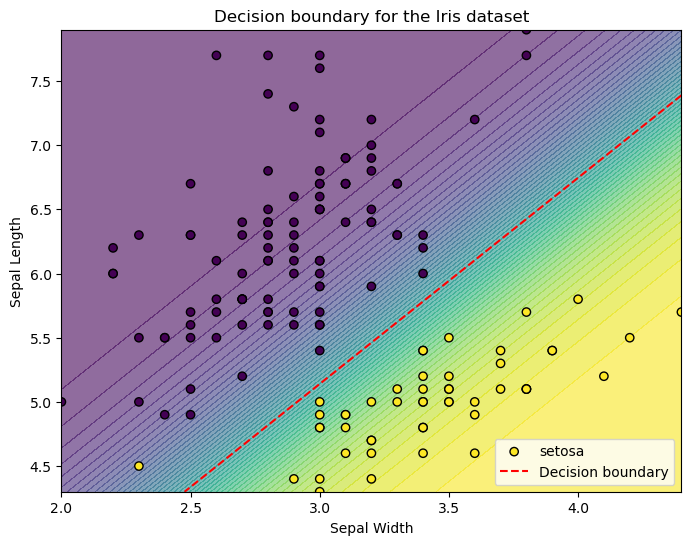

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Load the iris dataset
iris = sns.load_dataset("iris")

# Create a binary target variable
iris['is_setosa'] = (iris['species'] == 'setosa').astype(int)

# Fit the logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(iris[['sepal_width', 'sepal_length']], iris['is_setosa'])

# Define the logistic function for two variables
def logistic_function(x1, x2, alpha=model.intercept_[0], beta1=model.coef_[0][0], beta2=model.coef_[0][1]):
    z = alpha + beta1 * x1 + beta2 * x2
    return 1 / (1 + np.exp(-z))

# Generate a grid over the feature space
sepal_width = np.linspace(iris['sepal_width'].min(), iris['sepal_width'].max(), 100)
sepal_length = np.linspace(iris['sepal_length'].min(), iris['sepal_length'].max(), 100)
xx, yy = np.meshgrid(sepal_width, sepal_length)

# Compute the probabilities over the grid
probs = logistic_function(xx.ravel(), yy.ravel())

# Create the plot
plt.figure(figsize=(8, 6))

# Generate the contour plot for the probabilities
contour = plt.contourf(xx, yy, probs.reshape(xx.shape), levels=50, cmap='viridis', alpha=0.6)

# Generate the decision boundary
plt.contour(xx, yy, probs.reshape(xx.shape), levels=[0.5], colors='red', linestyles='dashed')

# Generate the scatter plot for the data points
scatter = plt.scatter(iris['sepal_width'], iris['sepal_length'], c=iris['is_setosa'], edgecolors='k', label='setosa')

# Add legend
handles, labels = scatter.legend_elements(prop='colors')
plt.legend(handles, ['not setosa', 'setosa'], title='Species')
plt.plot([], [], 'r--', label='Decision boundary')
plt.legend()

# Set the plot title and labels
plt.title('Decision boundary for the Iris dataset')
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')

plt.show()
